## A Logistic Regression binary classifier using the 470-feature data set.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, precision_score, recall_score, f1_score
from sklearn import preprocessing

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('CSV/feature_vectors_470.csv', index_col=False)

In [2]:
len(df.index)

11598

In [3]:
features = df.iloc[0:11598,0:469].values
y = df['Class'].values

In [4]:
features_train, features_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=42)

In [5]:
y_train_5 = (y_train!=5)
y_test_5 = (y_test!=5)

In [6]:
scaler = preprocessing.StandardScaler().fit(features_train)

In [7]:
features_scaled = scaler.transform(features_train)

In [8]:
clf = LogisticRegression(max_iter=1000)
clf.fit(features_scaled, y_train_5)

LogisticRegression(max_iter=1000)

In [9]:
cross_val_score(clf, features_scaled, y_train_5, cv=5, scoring="accuracy", verbose=True)

array([0.95258621, 0.95581897, 0.95959052, 0.95849057, 0.95363881])

In [10]:
y_train_pred = cross_val_predict(clf, features_scaled, y_train_5, cv=5)

In [11]:
confusion_matrix(y_train_5, y_train_pred)

array([[1133,  314],
       [  94, 7737]])

In [12]:
precision_score(y_train_5, y_train_pred)

0.9609986337100981

In [13]:
recall_score(y_train_5, y_train_pred)

0.9879964244668624

In [14]:
f1_score(y_train_5, y_train_pred)

0.9743105402342275

In [15]:
tn,fp,fn,tp = confusion_matrix(y_train_5,y_train_pred).ravel()

In [16]:
tn,fp,fn,tp

(1133, 314, 94, 7737)

In [17]:
test_scaler = preprocessing.StandardScaler().fit(features_test)

In [18]:
features_scaled = scaler.transform(features_test)

In [19]:
y_test_pred = cross_val_predict(clf, features_scaled, y_test_5, cv=3)

In [20]:
confusion_matrix(y_test_5, y_test_pred)

array([[ 248,  100],
       [  28, 1944]])

In [21]:
precision_score(y_test_5, y_test_pred)

0.9510763209393346

In [22]:
recall_score(y_test_5, y_test_pred)

0.9858012170385395

In [23]:
f1_score(y_test_5, y_test_pred)

0.9681274900398407

In [24]:
tn,fp,fn,tp = confusion_matrix(y_test_5, y_test_pred).ravel()

In [25]:
tn,fp,fn,tp

(248, 100, 28, 1944)

In [26]:
confusion_matrix(y_test_5, y_test_pred, normalize = 'all')

array([[0.10689655, 0.04310345],
       [0.01206897, 0.83793103]])

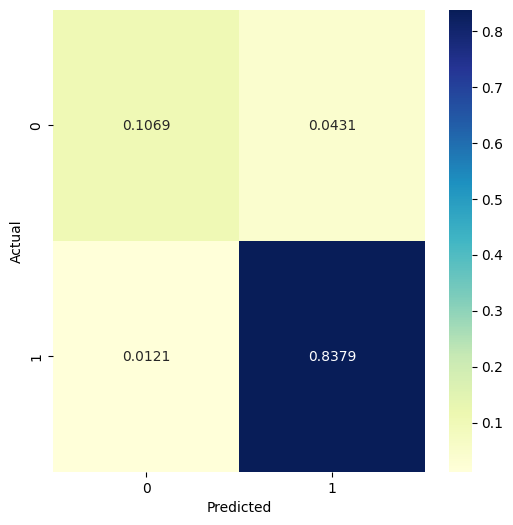

In [27]:
cm = confusion_matrix(y_test_5, y_test_pred, normalize='all')
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='.4f', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

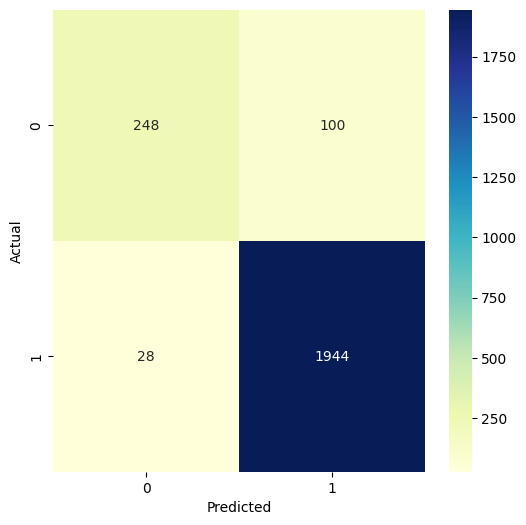

In [28]:
cm = confusion_matrix(y_test_5, y_test_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)